# Part 1: Data Cleaning & Preparation
1. Load the CSV file using Pandas.
2. Check for missing values and handle them appropriately.
3. Convert the Order Date column to datetime format.
4. Add a new column Month extracted from the date.
5. Calculate Total Sales if not already in the dataset.

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv(r'C:\Users\ziaah\OneDrive\Desktop\Z_Work\My Work\Sir Raheel Task\sales_data_shoptrendz.csv')
df

,Order ID,Product Name,Category,City,Order Date,Units Sold,Unit Price,Total Sales
0,1,Laptop,Electronics,Karachi,21-05-2023,7,39928.88,279502.16
1,2,Laptop,Electronics,NaN,14-02-2023,8,30133.59,241068.72
2,3,Laptop,Electronics,NaN,30-04-2023,7,22568.72,157981.04
3,4,Bluetooth Speaker,Electronics,Peshawar,03-08-2023,7,3375.14,23625.98
4,5,Wireless Mouse,Electronics,Lahore,24-12-2023,8,17018.58,136148.64
...,...,...,...,...,...,...,...,...
95,96,Backpack,Fashion,Islamabad,17-02-2023,2,41966.65,83933.30
96,97,Headphones,Electronics,NaN,12-04-2023,9,6116.94,55052.46
97,98,Jeans,Fashion,Peshawar,07-02-2023,7,27301.67,191111.69
98,99,Backpack,Fashion,Lahore,23-12-2023,3,11813.23,35439.69


In [3]:
df_cleaned = df.dropna()

In [4]:
df['City'] = df['City'].fillna('GHQ')

In [5]:
df['Unit Price'] = df['Unit Price'].fillna(df['Unit Price'].mean())

In [6]:
df['Total Sales'] = df['Units Sold'] * df['Unit Price']

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

In [8]:
df['Month'] = df['Order Date'].dt.to_period('M')

In [9]:
df.isnull().sum()

Order ID        0
Product Name    0
Category        0
City            0
Order Date      0
Units Sold      0
Unit Price      0
Total Sales     0
Month           0
dtype: int64

In [10]:
df['Total Sales'].sum()

13379356.8184375

# Part 2: Exploratory Data Analysis (EDA)

1. Find:
 - Total number of orders
 - Total revenue
 - Average sales per order
 - Top 5 best-selling products

2. Calculate:
 - Monthly sales trends
 - City-wise sales distribution
 - Category-wise revenue comparison


In [11]:
df['Order ID'].count()

100

In [12]:
df['Total Sales'].sum()

13379356.8184375

In [13]:
average_sales_per_order = df['Total Sales'].sum() / df['Order ID'].nunique()
print("Average Sales per Order:", average_sales_per_order)

Average Sales per Order: 133793.568184375


In [14]:
top_revenue_products = (df.groupby('Product Name')['Total Sales'].sum().sort_values(ascending=False).head(5))
top_revenue_products

Product Name
Laptop        2.293089e+06
Smartwatch    2.023782e+06
Sneakers      1.393787e+06
Headphones    1.314844e+06
Jeans         1.200438e+06
Name: Total Sales, dtype: float64

In [15]:
df

,Order ID,Product Name,Category,City,Order Date,Units Sold,Unit Price,Total Sales,Month
0,1,Laptop,Electronics,Karachi,2023-05-21,7,39928.88,279502.16,2023-05
1,2,Laptop,Electronics,GHQ,2023-02-14,8,30133.59,241068.72,2023-02
2,3,Laptop,Electronics,GHQ,2023-04-30,7,22568.72,157981.04,2023-04
3,4,Bluetooth Speaker,Electronics,Peshawar,2023-08-03,7,3375.14,23625.98,2023-08
4,5,Wireless Mouse,Electronics,Lahore,2023-12-24,8,17018.58,136148.64,2023-12
...,...,...,...,...,...,...,...,...,...
95,96,Backpack,Fashion,Islamabad,2023-02-17,2,41966.65,83933.30,2023-02
96,97,Headphones,Electronics,GHQ,2023-04-12,9,6116.94,55052.46,2023-04
97,98,Jeans,Fashion,Peshawar,2023-02-07,7,27301.67,191111.69,2023-02
98,99,Backpack,Fashion,Lahore,2023-12-23,3,11813.23,35439.69,2023-12


In [16]:
monthly_sales = df.groupby('Month')['Total Sales'].sum()
monthly_sales

Month
2023-01    8.030770e+05
2023-02    2.438471e+06
2023-03    5.555226e+05
2023-04    6.703306e+05
2023-05    1.645136e+06
2023-06    5.695897e+05
2023-07    1.089333e+06
2023-08    1.261043e+06
2023-09    9.097484e+05
2023-10    8.437833e+05
2023-11    1.173879e+06
2023-12    1.419443e+06
Freq: M, Name: Total Sales, dtype: float64

In [17]:
City_wise_sales = df.groupby('City')['Total Sales'].sum()
City_wise_sales

City
Faisalabad    2.689697e+06
GHQ           4.619325e+05
Islamabad     1.908888e+06
Karachi       3.384682e+06
Lahore        2.852734e+06
Peshawar      2.081423e+06
Name: Total Sales, dtype: float64

In [18]:
Category_wise_sales = df.groupby('Category')['Total Sales'].sum()
Category_wise_sales 

Category
Electronics    8.722242e+06
Fashion        4.657115e+06
Name: Total Sales, dtype: float64

# Part 3: Data Visualization using Matplotlib
Create the following plots using Matplotlib:
- Line plot of monthly sales.
- Bar chart of top 5 products by units sold.
- Pie chart of category-wise revenue share.
- Horizontal bar plot of city-wise total sales.
 >Use proper titles, labels, grid, and colors.

In [21]:
import matplotlib.pyplot as pt

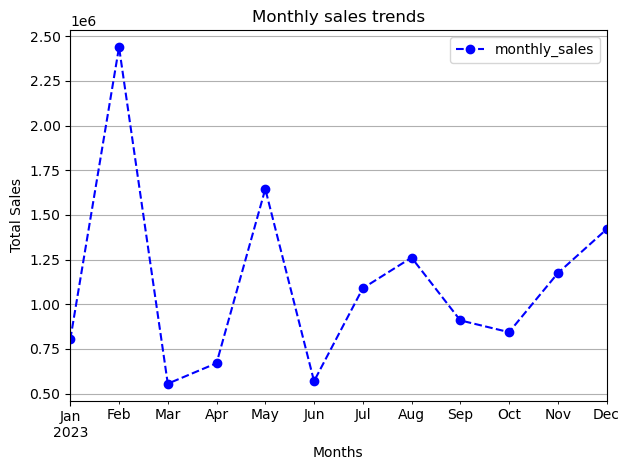

In [26]:
monthly_sales.plot(kind='line',ls='--',color='b', marker='o',label='monthly_sales')
pt.title("Monthly sales trends")
pt.xlabel("Months")
pt.ylabel("Total Sales")
pt.grid(True)
pt.legend()
pt.tight_layout()
pt.show()

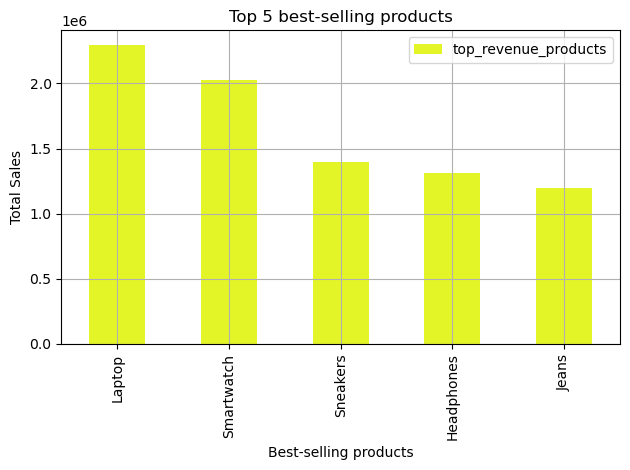

In [42]:
top_revenue_products.plot(kind='bar',ls='--',color='#E4F527',label='top_revenue_products')
pt.title("Top 5 best-selling products")
pt.xlabel("Best-selling products")
pt.ylabel("Total Sales")
pt.grid(True)
pt.legend()
pt.tight_layout()
pt.show()

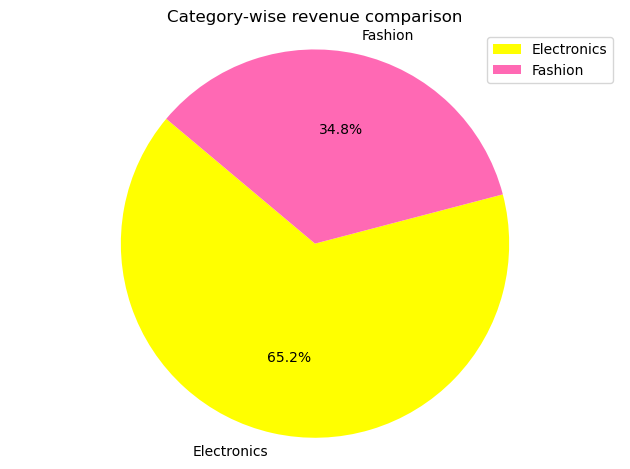

In [52]:
pt.pie(Category_wise_sales,labels=Category_wise_sales.index,autopct='%1.1f%%',startangle=140,colors=['yellow', '#FF69B4'])
pt.title("Category-wise Revenue Comparison")
pt.axis('equal')
pt.title("Category-wise revenue comparison")
pt.grid(True)
pt.legend()
pt.tight_layout()
pt.show()

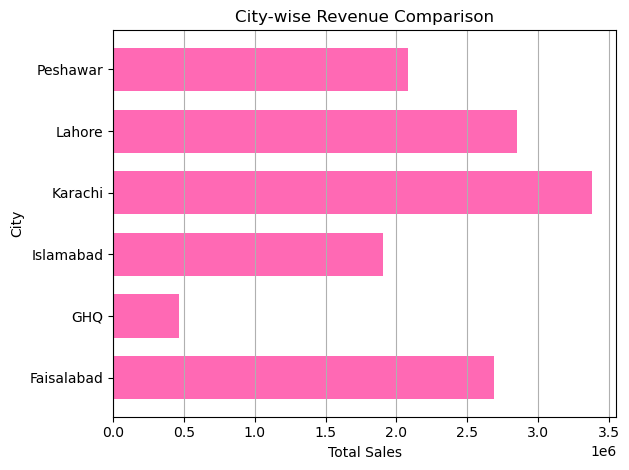

In [59]:
pt.barh(City_wise_sales.index, City_wise_sales.values, color='#FF69B4', height=0.7)

pt.title("City-wise Revenue Comparison")
pt.xlabel("Total Sales")
pt.ylabel("City")
pt.grid(True, axis='x')
pt.tight_layout()
pt.show()